<a href="https://www.kaggle.com/code/kimrasgado/exploratory-data-analysis-airbnb-open-data?scriptVersionId=161576097" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


# Preparing Airbnb Data

In [2]:
# Load CSV file into DataFrame
df = pd.read_csv("/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv", low_memory=False)

In [3]:
# First exploration: object type, shape, and head. 
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (102599, 26)


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [4]:
# Rename the columns and replace white spaces in column names with "_"
df.columns = df.columns.str.replace(' ', '_')

In [5]:
# Exloring the data type of each column.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Cleaning 

In [6]:
# Drop the "license" and "house_rules" columns. "License" has only 2 non-null values, and "house_rules" is not relevant for this analysis.

df.drop( columns = ["license","house_rules"], inplace = True)

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)


df type: <class 'pandas.core.frame.DataFrame'>
df shape: (102599, 24)


In [7]:
# Drop null values 
df.dropna(inplace = True)
print("df type:", type(df))
print("df shape:", df.shape)

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (83878, 24)


In [8]:
# Transform data type 'service fee' and "price" from object to float 
df["service_fee"] = df["service_fee"].str.replace("$", "").str.replace(",", "").astype(float)
df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)


In [9]:
#df["price"] = (
 #   df["price"]
  #  .str.replace("$", "", regex=False)
   # .str.replace(",", "")
    #.astype(float))

In [10]:
#  plotly express to create figure
fig = px.scatter_mapbox(
    df, 
    lat= "lat",
    lon= "long",
    center={"lat": 40.7128, "lon": -74.0060},  # Map will be centered on New york City
    width=800,  # Width of map
    height=800,  # Height of map
    hover_data=["price"],  # Display price when hovering mouse over house
) 

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

fig.show()

> The concentration of data at similar latitudes and longitudes suggests that the dataset is uniquely related to New York.




# Patterns Recognition


### Categorical Data: "neighbourhood group"


In [11]:
# I decided to beging the analysys with the columns neighbourhood_group and neighbourhood
df[["neighbourhood_group","neighbourhood"]].head()

neighbourhood_group       neighbourhood
0            Brooklyn          Kensington
1           Manhattan             Midtown
4           Manhattan         East Harlem
5           Manhattan         Murray Hill
7            Brooklyn  Bedford-Stuyvesant

In [12]:
#Exploring uniques values in neighbourhood_group and neighbourhood
print ("unique_values",df[["neighbourhood_group","neighbourhood"]].nunique())

unique_values neighbourhood_group      6
neighbourhood          223
dtype: int64


In [13]:
# Identifying values in neighbourhood_group
df["neighbourhood_group"].value_counts()

neighbourhood_group
Brooklyn         34827
Manhattan        34755
Queens           11189
Bronx             2284
Staten Island      822
brookln              1
Name: count, dtype: int64

> I need to correct "brookln" with "Brooklyn" in the Neighborhood Column


In [14]:
# Correcting Misspelling. Replacing "brookln" with "Brooklyn" in the neighbourhood_group Column
df["neighbourhood_group"] = df["neighbourhood_group"].replace({"brookln": "Brooklyn"})

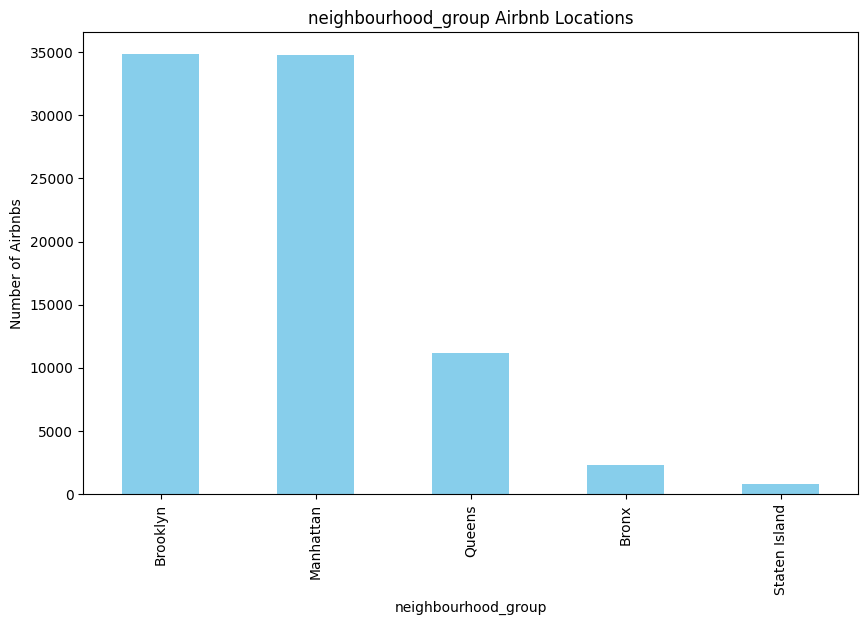

In [15]:
# Analyzing neighbourhood_group Airbnb Locations

top_neighborhoods = df["neighbourhood_group"].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('neighbourhood_group Airbnb Locations')
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of Airbnbs')
plt.show()

> Brooklyn has the highest number of Airbnb listings
* It could be interesting to analyze the price distribution across Brooklyn 

In [16]:
# Finding the 10 neighborhoods with the most Airbnb locations.
df["neighbourhood"].value_counts().head(10)

neighbourhood
Bedford-Stuyvesant    6791
Williamsburg          6365
Harlem                4577
Bushwick              4011
Hell's Kitchen        3202
Upper West Side       3013
Upper East Side       2954
East Village          2806
Crown Heights         2710
Midtown               2438
Name: count, dtype: int64

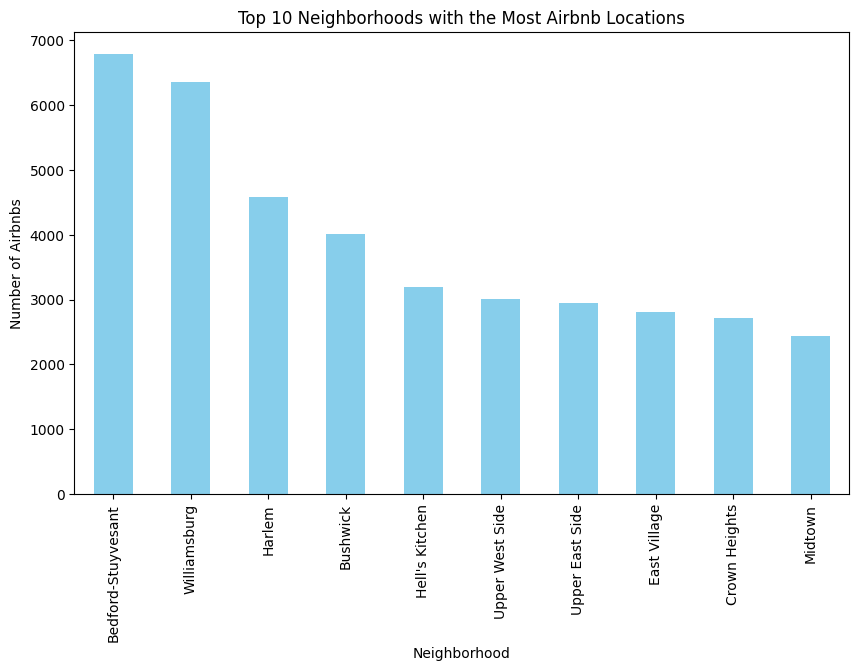

In [17]:
# Analyzing the Top 10 Neighborhoods with the Most Airbnb Locations

top_neighborhoods = df["neighbourhood"].value_counts().head(10)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Most Airbnb Locations')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Airbnbs')
plt.show()

# summary statistics 

### Descriptive Statistics 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83878 entries, 0 to 102597
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83878 non-null  int64  
 1   NAME                            83878 non-null  object 
 2   host_id                         83878 non-null  int64  
 3   host_identity_verified          83878 non-null  object 
 4   host_name                       83878 non-null  object 
 5   neighbourhood_group             83878 non-null  object 
 6   neighbourhood                   83878 non-null  object 
 7   lat                             83878 non-null  float64
 8   long                            83878 non-null  float64
 9   country                         83878 non-null  object 
 10  country_code                    83878 non-null  object 
 11  instant_bookable                83878 non-null  object 
 12  cancellation_policy             8387

In [19]:
#Getting a general Understanding.
df[["price","service_fee", "review_rate_number"]].describe()


price   service_fee  review_rate_number
count  83878.000000  83878.000000         83878.00000
mean     626.164143    125.233875             3.27943
std      331.797762     66.363056             1.28311
min       50.000000     10.000000             1.00000
25%      340.000000     68.000000             2.00000
50%      625.000000    125.000000             3.00000
75%      914.000000    183.000000             4.00000
max     1200.000000    240.000000             5.00000

> With a price mean of 626.17 and a relatively large standard deviation of 331.7, 
> I've decided to visualize the data to understand its distribution better.
 

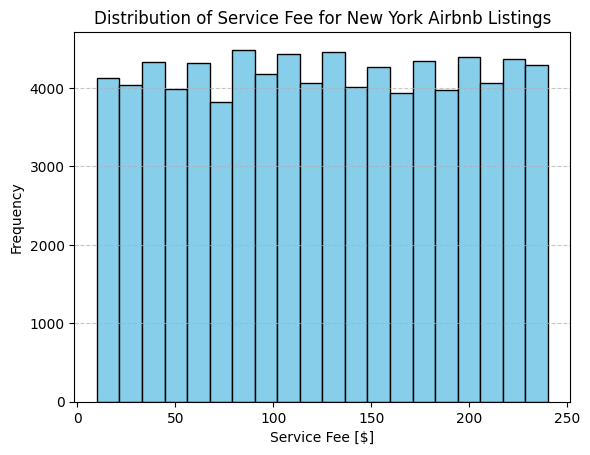

In [20]:
# Getting more Insights, creatting an Histogram and observe the data distribution  
plt.hist(df["service_fee"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Service Fee [$]")
plt.ylabel("Frequency")
plt.title("Distribution of Service Fee for New York Airbnb Listings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> the histogram of the price fees for New York Airbnb listings appears as a flat distribution
> * There is no specific price range that is more likely than others.
> * There are no dominant price points or specific price preferences within the dataset.

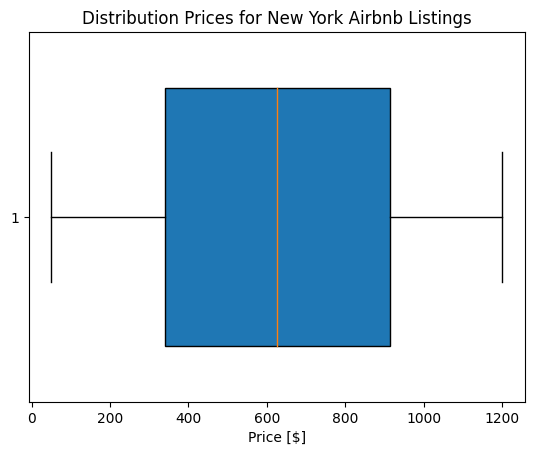

In [21]:
# Summarizing Home Prices of New york Airbnb listing
plt.show()
plt.boxplot(df["price"], vert=False, widths=0.7, patch_artist=True)
plt.xlabel("Price [$]")
plt.title("Distribution Prices for New York Airbnb Listings")
plt.show()



> The behavior of the Prices column is similar to that of the service fee column, indicating a flat distribution.

In [22]:

#  Further Investigation:  Distribution of prices by Neighbood

fig = px.box(df, x="neighbourhood_group", y="price")
fig.update_traces(quartilemethod="exclusive") 
fig.update_layout(title="Distribution of prices by Neighbood")

fig.show()

# Uncovering insights

#### Which neighbourhood_group and neighbourhood has the highest prices among New York Airbnb listings?

In [23]:
# Mean price by neighbourhood_group
mean_price_by_neighbourhood_group = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending = False).round(2)

# Print object type, shape, and head
print("mean_price_by_neighbourhood_group type:", type(mean_price_by_neighbourhood_group))
print("mean_price_by_neighbourhood_group shape:", mean_price_by_neighbourhood_group.shape)
mean_price_by_neighbourhood_group

mean_price_by_neighbourhood_group type: <class 'pandas.core.series.Series'>
mean_price_by_neighbourhood_group shape: (5,)


neighbourhood_group
Queens           630.45
Bronx            630.26
Brooklyn         627.50
Manhattan        623.25
Staten Island    622.73
Name: price, dtype: float64

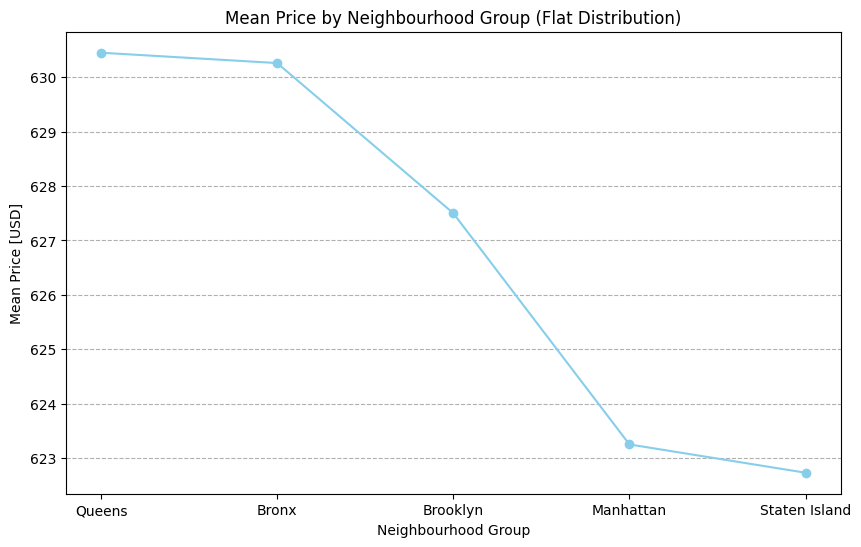

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_neighbourhood_group, 'o-', color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price [USD]')
plt.title('Mean Price by Neighbourhood Group (Flat Distribution)')
plt.grid(axis='y', linestyle='--')
plt.show()

> Queens stands out as the most expensive Neighbourhood Group; however, the prices across all six groups are quite similar

In [25]:
# Top 10 Mean prices by neighbourhood

mean_price_by_neighbourhood = df.groupby("neighbourhood")["price"].mean().sort_values(ascending = False).round(2)

# Print object type, shape, and head
print("mean_price_by_neighbourhood type:", type(mean_price_by_neighbourhood))
print("mean_price_by_neighbourhood shape:", mean_price_by_neighbourhood.shape)
mean_price_by_neighbourhood_10 = mean_price_by_neighbourhood.head(10)

mean_price_by_neighbourhood type: <class 'pandas.core.series.Series'>
mean_price_by_neighbourhood shape: (223,)


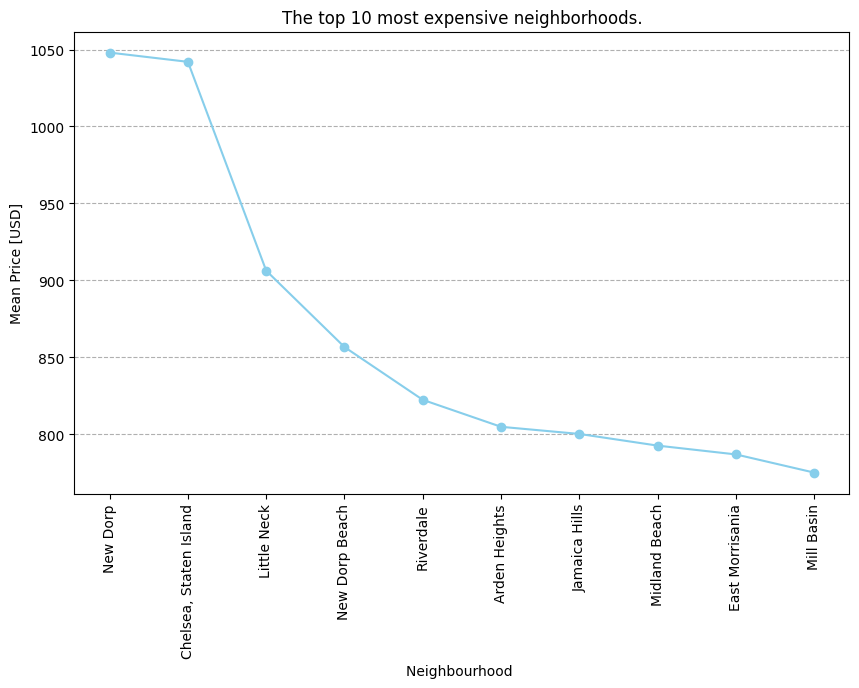

In [26]:
# The top 10 most expensive neighborhoods.
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_neighbourhood_10, 'o-', color='skyblue')
plt.xlabel('Neighbourhood ')
plt.ylabel('Mean Price [USD]')
plt.title('The top 10 most expensive neighborhoods.')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.show()

#### Is the price influenced by the review rate?

In [27]:
mean_price_by_neighbourhood_review = df.groupby("neighbourhood").agg({
    "price": "mean",
    "review_rate_number": "mean"
}).sort_values(by="price", ascending=False).round(1)
mean_price_by_neighbourhood_review.head(10)

price  review_rate_number
neighbourhood                                     
New Dorp                1048.0                 4.0
Chelsea, Staten Island  1042.0                 2.0
Little Neck              906.3                 4.3
New Dorp Beach           856.7                 3.9
Riverdale                822.4                 2.9
Arden Heights            804.9                 3.8
Jamaica Hills            800.2                 2.7
Midland Beach            792.7                 3.4
East Morrisania          787.0                 3.2
Mill Basin               775.1                 3.8

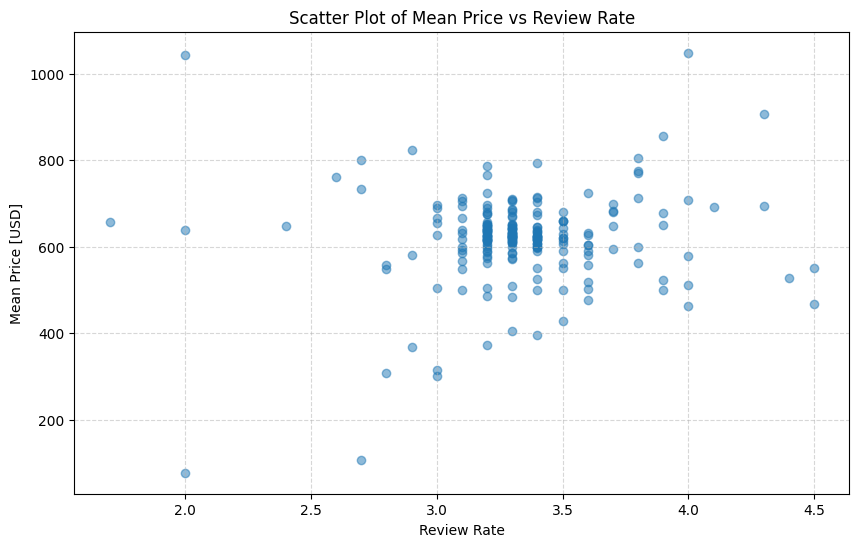

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(mean_price_by_neighbourhood_review["review_rate_number"], mean_price_by_neighbourhood_review["price"], alpha=0.5)
plt.title('Scatter Plot of Mean Price vs Review Rate')
plt.xlabel('Review Rate')
plt.ylabel('Mean Price [USD]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

> From the last chart, we can observe that there is no direct correlation between the price and the review rate of Airbnb listings in New York

In [29]:
# Calculating the correlation coefficient
correlation_coef = mean_price_by_neighbourhood_review["review_rate_number"].corr(mean_price_by_neighbourhood_review["price"])

correlation_coef.round(4)

0.106

> ### Migh be intersting exploring the relation Between (availability 365) and the prices... Basically  supply and demand --- Ideas

In [30]:
#  Further Investigation:  Distribution of prices by Neighbood

fig = px.box(df, x="neighbourhood_group", y="availability_365")
fig.update_traces(quartilemethod="exclusive") 
fig.update_layout(title="Distribution of availability_365 by Neighbood")

fig.show()

In [31]:
# Dropping alues greater than 3500 from the availability_365 
import plotly.express as px

df_filtered = df[df['availability_365'] <= 3500]

fig = px.box(df_filtered, x="neighbourhood_group", y="availability_365")
fig.update_traces(quartilemethod="exclusive") 
fig.update_layout(title="Distribution of availability_365 by Neighbourhood")

fig.show()